In [82]:
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


In [83]:
classifier = svm.SVC(gamma=0.001)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

classifier.fit(X_train, y_train)


SVC(gamma=0.001)

Predicted: 9


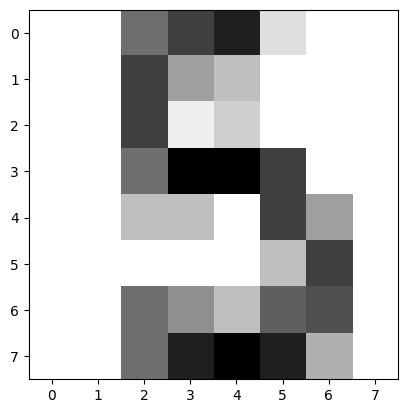

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = np.random.randint(int(n_samples/2), n_samples)
plt.imshow(digits.images[n], cmap=plt.cm.gray_r, interpolation="nearest")
print("Predicted: " + str(classifier.predict(digits.data[n:n+1])[0]))

In [85]:
import time

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

XA, XB, yA, yB = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

In [86]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000)

In [87]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [88]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101, tol=1e-3, max_iter=1000)

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=5)

In [91]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=1, random_state=101, max_features=None, min_samples_leaf=3)

In [92]:
from sklearn.svm import SVC
svm = SVC(gamma='scale', C=1.0, random_state=101)

In [96]:
from sklearn.neural_network import MLPClassifier
nn= MLPClassifier(solver='lbfgs', alpha=1e-5,max_iter=200, activation='relu', hidden_layer_sizes=(10,30,10),random_state=1, shuffle=True)

Train Classifiers
nb time: 0.00493
lr time: 0.99178
sgd time: 0.02108
knn time: 0.00101
dt time: 0.00829
rfm time: 0.6021
svm time: 0.02278
nn time: 0.37799
Test Classifiers
nb predicts: 3 time: 0.00108
lr predicts: 3 time: 0.0
sgd predicts: 3 time: 0.00096
knn predicts: 3 time: 0.00596
dt predicts: 3 time: 0.00101
rfm predicts: 3 time: 0.011
svm predicts: 3 time: 0.00051
nn predicts: 3 time: 0.0
Label: 3


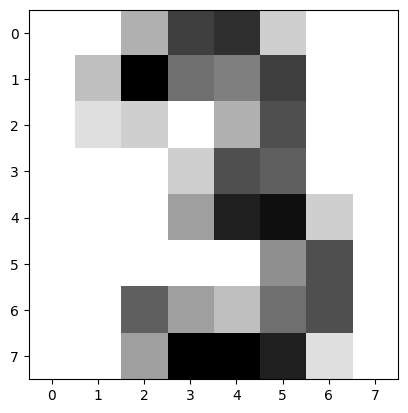

In [104]:
import time

m = [nb, lr, sgd, knn, dtree, rfm, svm, nn]
s = ['nb', 'lr', 'sgd', 'knn', 'dt', 'rfm', 'svm', 'nn']

print('Train Classifiers')
for i, x in enumerate(m):
    st = time.time()
    x.fit(XA, yA)
    tf = str(round(time.time()-st,5))
    print(s[i] + ' time: ' + tf)

n = np.random.randint(int(n_samples/2), n_samples)
Xt = digits.data[n:n+1]

print('Test Classifiers')
for i, x in enumerate(m):
    st = time.time()
    yt = x.predict(Xt)
    tf = str(round(time.time() - st, 5))
    print(s[i] + ' predicts: ' + str(yt[0]) + ' time: ' + tf)

print('Label: ' +str(digits.target[n:n+1][0]))

plt.imshow(digits.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
